# Irony Detection in English - Task 2

#### The goal of this task is to create a classifier capable of classifing different types of irony

Like the task one that in this [notebook](Irony_Detection_in_English_Tweets.ipynb) we explore with more detail.

### The Dataset

* The dataset used for this task contains the same tweets from the one used in the task 1, but label in a different way

Furthermore we decide to use the data in a different way from the one in the task 1. Instead of using the split in train and test made by the organization we will manipulate the data and try two scenarios in order to use the scikit learn model split function and K-Folds cross validation:

1. Use the train dataset alone
2. Join the train and test datasets making sure they remain balanced

This classification task is not binary as the first one. This task is a multiclass problem. In this task the labels have the following meaning:

0. Non-ironic
1. Ironic by clash
2. Situational irony
3. Other irony
**From this two scenarios, we will choose the one that performs better in a preliminary analyses**

In [81]:
from IPython.display import display, HTML
import pandas
import numpy

train_data=pandas.read_csv('data/task2/train.csv',  delimiter = '\t', quoting = 3, encoding="utf-8")
all_data=pandas.read_csv('data/task2/all.csv', delimiter = '\t', quoting = 3, encoding="utf-8")

In [82]:
train_data.head()

,label,tweet
0,1,Sweet United Nations video. Just in time for C...
1,1,@mrdahl87 We are rumored to have talked to Erv...
2,1,Hey there! Nice to see you Minnesota/ND Winter...
3,0,3 episodes left I'm dying over here
4,2,"""I can't breathe!"" was chosen as the most nota..."


In [83]:
all_data.head()

,label,tweet
0,0,@Callisto1947 Can U Help?||More conservatives ...
1,2,"Just walked in to #Starbucks and asked for a ""..."
2,0,#NOT GONNA WIN http://t.co/Mc9ebqjAqj
3,0,@mickymantell He is exactly that sort of perso...
4,1,So much #sarcasm at work mate 10/10 #boring 10...


<AxesSubplot:xlabel='label'>

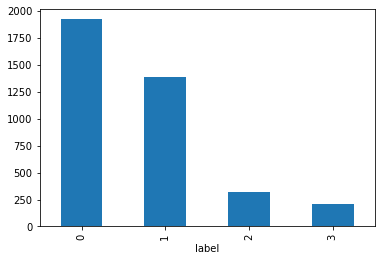

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

train_data.groupby('label').size().plot.bar()

<AxesSubplot:xlabel='label'>

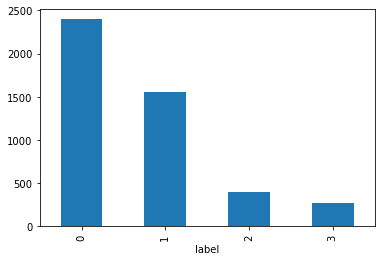

In [85]:
all_data.groupby('label').size().plot.bar()

#### Different from the task 1 the dataset is pretty much unbalanced towards the inexistance of irony in the tweets

This fact could introduced bias in the classficator. This way special attention to the fenomena of overfitting must be taken into account

### Cross Validation to Check which solution is the best

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

corpus_test=pre_processing_pipeline(train_data)

X , y, X_train,y_train,X_test,y_test=refresh_data(corpus_test,train_data['label'])

classifier=GaussianNB()

scores=cross_val_score(classifier,X,y,cv=10,scoring='accuracy')

print(scores.mean())

0.32184508268059175


In [87]:
corpus_all=pre_processing_pipeline(all_data)

X , y, X_train,y_train,X_test,y_test=refresh_data(corpus_all,all_data['label'])

classifier=GaussianNB()

scores=cross_val_score(classifier,X,y,cv=10,scoring='accuracy')

print(scores.mean())

0.2886398850607093


#### From this results we can infere that use only the training set will produce better results.

### Handle the Unbalanced Dataset

We will try how the same Naive Bayes model would perform with after applying sampling techniques in order to balance the dataset

In [56]:
from sklearn.utils import resample
from IPython.display import display, HTML
import pandas
import numpy

train_data=pandas.read_csv('data/task2/train.csv',  delimiter = '\t', quoting = 3, encoding="utf-8")

df_majority=train_data[train_data.label==0]
df_minority_1=train_data[train_data.label==1]
df_minority_2=train_data[train_data.label==2]
df_minority_3=train_data[train_data.label==3]

df_minority_1_upsampled = resample(df_minority_1,replace=True,n_samples=1900,random_state=123)
df_minority_2_upsampled = resample(df_minority_2,replace=True,n_samples=1900,random_state=123)
df_minority_3_upsampled = resample(df_minority_3,replace=True,n_samples=1900,random_state=123)

train_data=pandas.concat([df_majority,df_minority_1_upsampled,df_minority_2_upsampled,df_minority_3_upsampled],ignore_index=True)

<AxesSubplot:xlabel='label'>

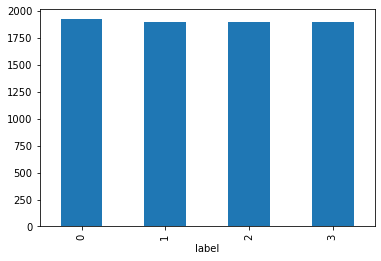

In [57]:
train_data.groupby('label').size().plot.bar()

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

corpus=pre_processing_pipeline(train_data)

X , y, X_train,y_train,X_test,y_test=refresh_data(corpus,train_data['label'])

classifier=GaussianNB()

scores=cross_val_score(classifier,X,y,cv=10,scoring='accuracy')

print(scores.mean())

0.5960856957100547


### Over Sampling Strategy was a success. The oversampled dataset will hold

#### Naive Bayes

In [66]:
corpus=pre_processing_pipeline(train_data)

X, y, X_train,y_train,X_test,y_test=refresh_data(corpus,train_data['label'])

classifier=GaussianNB()

classifier.fit(X_train,y_train)

y_predicted=classifier.predict(X_test)

print_stats()

              precision    recall  f1-score   support

           0       0.74      0.07      0.12       384
           1       0.63      0.45      0.52       380
           2       0.67      0.85      0.75       397
           3       0.51      1.00      0.68       364

    accuracy                           0.59      1525
   macro avg       0.64      0.59      0.52      1525
weighted avg       0.64      0.59      0.52      1525

[[ 25  96 108 155]
 [  9 170  61 140]
 [  0   4 339  54]
 [  0   0   0 364]]
           Our Results  Winners Result
Accuracy      0.588852          0.7347
Precision     0.637619          0.6304
F1-Value      0.516833          0.8006


#### Neural Network

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

corpus=pre_processing_pipeline(train_data)
X, y, X_train,y_train,X_test,y_test=refresh_data(corpus,train_data['label'])

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = MLPClassifier(max_iter=1500,activation='relu',solver='adam')

classifier.fit(X_train,y_train)

y_predicted=classifier.predict(X_test)

print_stats()

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       388
           1       0.83      0.79      0.81       401
           2       0.94      1.00      0.97       357
           3       0.95      1.00      0.98       379

    accuracy                           0.88      1525
   macro avg       0.88      0.89      0.89      1525
weighted avg       0.88      0.88      0.88      1525

[[296  63  19  10]
 [ 72 317   3   9]
 [  0   0 357   0]
 [  0   0   0 379]]
            Results
Accuracy   0.884590
Precision  0.881173
F1-Value   0.882240


#### Decision Tree

##### Grid Search

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

corpus=pre_processing_pipeline(train_data)
X, y, X_train,y_train,X_test,y_test=refresh_data(corpus,train_data['label'])

param_grid = { 'criterion':['gini','entropy'],'max_depth': numpy.arange(2, 15)}
# decision tree model
classifier=DecisionTreeClassifier()

#use gridsearch to test all values
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 14}


In [88]:
corpus=pre_processing_pipeline(train_data)
X, y, X_train,y_train,X_test,y_test=refresh_data(corpus,train_data['label'])

# decision tree model
classifier=DecisionTreeClassifier(criterion='gini',max_depth=14)

classifier.fit(X_train,y_train)

y_predicted=classifier.predict(X_test)

print_stats()

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       360
           1       0.71      0.53      0.61       284
           2       0.54      0.75      0.62        71
           3       0.18      0.04      0.06        52

    accuracy                           0.68       767
   macro avg       0.53      0.55      0.52       767
weighted avg       0.66      0.68      0.65       767

[[314  35  11   0]
 [112 150  17   5]
 [  3  11  53   4]
 [ 17  15  18   2]]
            Results
Accuracy   0.676662
Precision  0.655558
F1-Value   0.652138


##### Helper Functions

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import emoji
import re
import contractions
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords


def pre_processing_pipeline(dataframe):
    dataframe['tweet'].str.replace('http\S+|www.\S+', '', case=False)
    dataframe['tweet'].str.replace('@\S+', '', case=False)
    dataframe['tweet'].str.replace('\d+', '', case=False)
    dataframe['tweet'].str.replace('#', '', case=False)
    
    emoji_result=[]

    for i in range(len(dataframe)):    
        demojize_result=emoji.demojize(dataframe.loc[i,'tweet'])
        #Remove the ":" from the convertion made by emoji
        demojize_result=re.sub(":", " ", demojize_result)
        demojize_result=re.sub("_", " ", demojize_result)
        demojize_result=re.sub("-", " ", demojize_result)
        emoji_result.append(demojize_result)


    dummy=[]
    for i in range(len(emoji_result)):
        dummy.append(contractions.fix(emoji_result[i]))

    from nltk.stem import WordNetLemmatizer

    lemmatizer = WordNetLemmatizer()

    lemmatization_result = []

    for i in range(len(dummy)):
        tweet = lemmatizer.lemmatize(dummy[i])
        lemmatization_result.append(tweet)

    ps = PorterStemmer()
    corpus = []

    for i in range(len(lemmatization_result)):
        # get review and remove non alpha chars
        tweet = re.sub('[^\w_\w]', ' ', lemmatization_result[i])
        # to lower-case and tokenize
        tweet = tweet.lower().split()
        # stemming and stop word removal
        tweet = ' '.join([ps.stem(w) for w in tweet if not w in set(stopwords.words('english'))])
        corpus.append(tweet)

    return corpus

In [77]:
from sklearn.model_selection import train_test_split

def refresh_data(X,y):
    vectorizer = TfidfVectorizer(max_features = 800)

    X=vectorizer.fit_transform(X).toarray()
    y=y.copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 29)
    
    
    return (X , y, X_train,y_train,X_test,y_test)

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


def print_stats():
    
    print(classification_report(y_test,y_predicted))
    print(confusion_matrix(y_test, y_predicted))
    accuracy_value=accuracy_score(y_test,y_predicted)
    precision_value=precision_score(y_test,y_predicted,average='weighted')
    f1_value=f1_score(y_test,y_predicted,average='weighted')

    actual_conclusion=pandas.DataFrame(
        {
        'Results':[accuracy_value,precision_value,f1_value],
        } , index=['Accuracy','Precision','F1-Value'])

    print(actual_conclusion.head())